#Getting Started with PySpark in Google Colab

PySpark is a Python interface for Apache Spark. The primary use cases for PySpark are to work with huge amounts of data and for creating data pipelines.


You don't need to work with big data to benefit from PySpark. I find that the SparkSQL is a great tool for performing routine data analysis. Pandas can get slow and you may find yourself writing a lot of code for data cleaning whereas the same actions take much less code in SQL. Let's get started!


See more here! http://spark.apache.org/docs/latest/api/python/


> Credits: Part of this introduction to pyspark was taken from here: https://colab.research.google.com/drive/1fa2G3YuXx3Isqyby5kFETqmWotFwtqlH?usp=sharing#scrollTo=hxv7w_2y2bb9

# 1. Installing PySpark in Google Colab

> Here we will install in the virtual machine all the requirements to run PySpark. It can take some time to install everything and set up.

In [42]:
!sudo apt update
# !apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Check this site for the latest download link https://www.apache.org/dyn/closer.lua/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j

import os
import sys
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"


import findspark
findspark.init()
findspark.find()

import pyspark

from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F

spark= SparkSession \
       .builder \
       .appName("Our First Spark Session") \
       .getOrCreate()
### print spark session info
spark

print("Now your Spark session is set up, and you are ready to start!")

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 229 kB in 2s (125 kB/s)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
51 packages can be upgraded. Run 'apt list --upgradable' to see them.
tar: spark-3.2.1-bin-hadoop3.2.tgz: Cannot open:

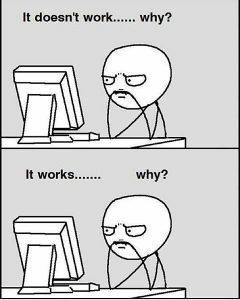

# 2. Connect this colab notebook to your Google Drive to read data

### Google Colab will ask you for permission to access your Google Drive. You will need to accept to be able to upload data on this notebook.

> You will use the same Google account you are logged in this Notebook (check it on the top right of your browser).

### Download Target file on **parquet** format from Open Targets platform:


> https://platform.opentargets.org/downloads

Save it in to your Google Drive

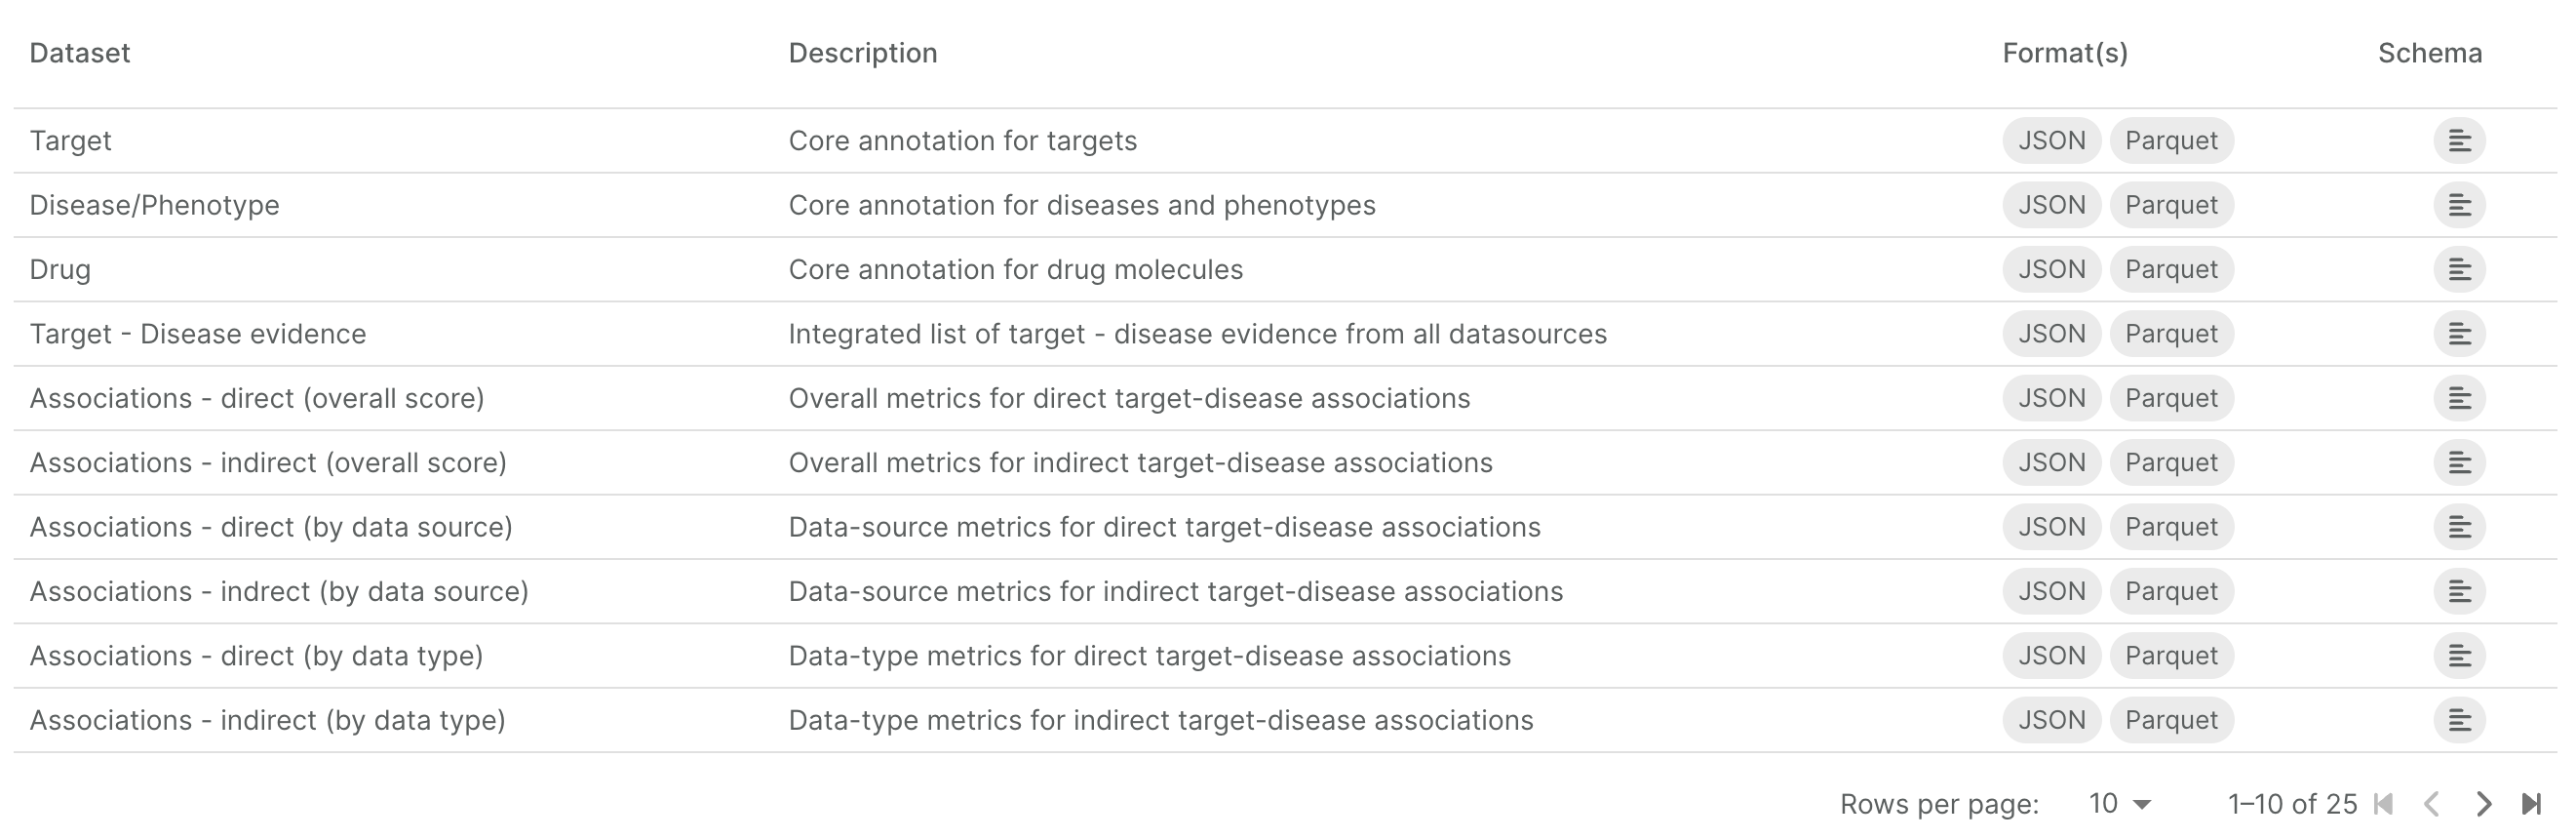

> A shortcut of the Targets Parquet file is my google Drive link:
https://drive.google.com/drive/folders/1ESzBvWa6svVXJCbFCRpVneuXCQV_gCHY?usp=sharing

> In the example below, I created the folder `Example` on my Google Drive and I uploaded the `targets` dataset there.



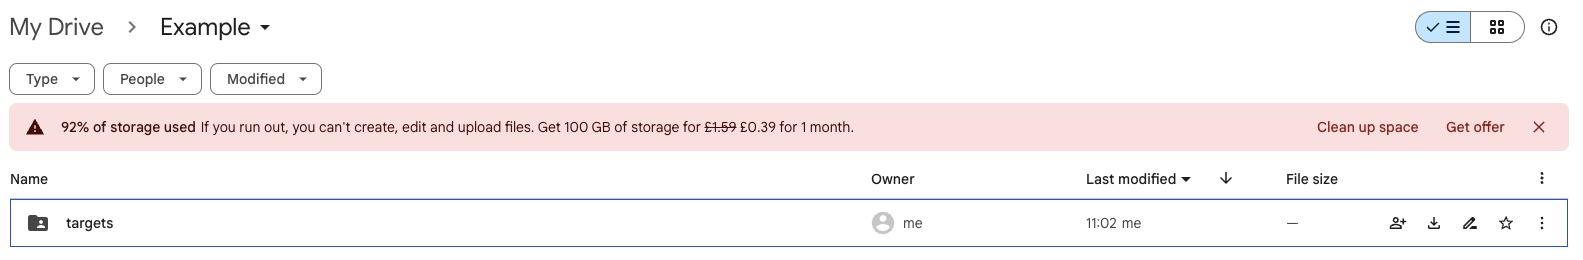

In [43]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Prepare the path to your targets file

In [44]:
### Below your path to the folder you uploaded the data in your Google Drive
my_path = "/Example/targets/" #

### The whole path to your data
gdrive_path = "/content/drive" + "/MyDrive" + my_path #

> You can use os.listdir() to print the list of files of your path

```
os.listdir("your path")
```

### We are ready to read the targets parquet file!

In [46]:
targets= spark.read.parquet("/content/drive/MyDrive/Example/targets/")

In [ ]:
targets.printSchema()

# 3. First operations with PySpark on the targets dataset.

### Very useful operations to know more about the dataset are:

* print schema: it will print an schema of the structure of the dataset

```
targets.printSchema()
```

* show (10) rows of the dataset.


```
targets.show(10)
```

* select columns and show/print schema:


```
targets.select("id","subcellularLocation").printSchema()
```

* create a new dataframe from the targets



```
targets_new=targets.select("id","subcellularLocation")
```

* filter rows based on a column value:



```
filtered_targets=targets.filter(F.col("approvedSymbol")=="MTOR")
```

* Explode array columns (columns with values nested in list)



```
exploded=targets.select("id",F.explode(F.col("subcellularLocations
")).alias("subcellularLocations"))
```







In [ ]:
### prints Schema (structure of dataframe)
targets.printSchema()

In [ ]:
### shows 10 rows of the dataframe
targets.show(10)

In [ ]:
### prints Schema from selected columns
targets.select("id","subcellularLocations").printSchema()

In [ ]:
## saves a new dataframe with the two column selected
targets_new=targets.select("id","subcellularLocations")

In [ ]:
## saves in a new dataframe after filtering
filtered_targets=targets.filter(F.col("approvedSymbol")=="MTOR")


In [ ]:
### shows the previous datasets
filtered_targets.show()

+---------------+--------------+--------------+--------------------+--------------------+--------------------+--------------------+----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|             id|approvedSymbol|       biotype|       transcriptIds| canonicalTranscript|      canonicalExons|     genomicLocation|alternativeGenes|        approvedName|                  go|           hallmarks|            synonyms|      symbolSynonyms|        nameSynonyms|functionDescriptions|subcellularLocations|         targetClass|     obsoleteSymbols|       obsoleteNames|          constraint| tep|          proteinIds|             dbXrefs|

In [ ]:
targets.printSchema()

# 4. Let's start with Drug Targets Discovery Science!


1.   TRACTABILITY.
```
How many targets are in the membrane? Pick up one of them to follow up in the next exercises.
```

2.   SAFETY.
```
Is there any safety concern about modulating that target?
```

3.   PROGRESSIBILITY.
```
Is there any tool to analyse the target experimentaly? (Chemical probes, mouse models...)
```
> We strongly recommend you to print the targets schema (`targets.printSchema()`) and look for columns that could contain this information.
  


### 1. How many targets are in the membrane?

In [49]:
### We need to take the information exploding subcellular Locations column (array Column):
targetsExploded=targets.select("id","approvedSymbol", F.explode_outer(F.col("subcellularLocations")).alias("subcellLocation"))
targetsExploded.printSchema()

root
 |-- id: string (nullable = true)
 |-- approvedSymbol: string (nullable = true)
 |-- subcellLocation: struct (nullable = true)
 |    |-- location: string (nullable = true)
 |    |-- source: string (nullable = true)
 |    |-- termSL: string (nullable = true)
 |    |-- labelSL: string (nullable = true)



In [50]:
### Now, in the exploded column there are four columns in an struct structure. We can take the interesting column using Select statements:
targetsLocation=targetsExploded.select("id","approvedSymbol","subcellLocation.location")
### After this, each target has a at least a location term (take a look, there are targets with multiple locations).
targetsLocation.show()
### Let's groupBy and find the numbers!

+---------------+--------------+--------------------+
|             id|approvedSymbol|            location|
+---------------+--------------+--------------------+
|ENSG00000002586|          CD99|            Membrane|
|ENSG00000002586|          CD99|     Golgi apparatus|
|ENSG00000015479|         MATR3|      Nucleus matrix|
|ENSG00000015479|         MATR3|         Nucleoplasm|
|ENSG00000037280|          FLT4|       Cell membrane|
|ENSG00000037280|          FLT4|           Cytoplasm|
|ENSG00000037280|          FLT4|             Nucleus|
|ENSG00000037280|          FLT4|[Isoform 1]: Cell...|
|ENSG00000037280|          FLT4|[Isoform 2]: Cell...|
|ENSG00000037280|          FLT4|[Isoform 3]: Secr...|
|ENSG00000037280|          FLT4|    Nuclear speckles|
|ENSG00000037280|          FLT4|     Plasma membrane|
|ENSG00000037280|          FLT4|      Cell Junctions|
|ENSG00000037280|          FLT4|Predicted to be s...|
|ENSG00000038427|          VCAN|            Secreted|
|ENSG00000038427|          V

In [51]:
### we continue with the code above to make an aggregation over the locations and find how many targets are in membrane.
targetsLocation.groupBy("location").agg(F.countDistinct("id").alias("counts")## groupBy location types and count the number of distinct targets id per group.
).filter(F.col("location")=="Membrane" ### get row of Membrane location
).show()

+--------+------+
|location|counts|
+--------+------+
|Membrane|  1660|
+--------+------+



In [52]:
### you can check in our platform the same information. for example, Pick up a target located in membrane and look for it in Open Targets Platform:
targetsLocation.filter(F.col("location")=="Membrane" ### get row of Membrane location
).show()
### Now, let's take one target for the next exercises.

+---------------+--------------+--------+
|             id|approvedSymbol|location|
+---------------+--------------+--------+
|ENSG00000002586|          CD99|Membrane|
|ENSG00000137486|         ARRB1|Membrane|
|ENSG00000166619|         BLCAP|Membrane|
|ENSG00000166862|        CACNG2|Membrane|
|ENSG00000171121|        KCNMB3|Membrane|
|ENSG00000182035|          ADIG|Membrane|
|ENSG00000183255|       PTTG1IP|Membrane|
|ENSG00000204296|         TSBP1|Membrane|
|ENSG00000213949|         ITGA1|Membrane|
|ENSG00000225968|         ELFN1|Membrane|
|ENSG00000007264|          MATK|Membrane|
|ENSG00000101363|        MANBAL|Membrane|
|ENSG00000107021|       TBC1D13|Membrane|
|ENSG00000182732|          RGS6|Membrane|
|ENSG00000185432|         TMT1A|Membrane|
|ENSG00000100427|          MLC1|Membrane|
|ENSG00000105429|         MEGF8|Membrane|
|ENSG00000110900|       TSPAN11|Membrane|
|ENSG00000124249|        KCNK15|Membrane|
|ENSG00000127329|         PTPRB|Membrane|
+---------------+--------------+--

### 2. Is there any safety concern about modulating that target?

```
Let's have a look at the Schema to find safety information
```

In [ ]:
targets.printSchema()

In [54]:
# safetyLiabilities Column
targeSafety=targets.select("id","approvedSymbol","safetyLiabilities")

In [55]:
targets.select("approvedSymbol",F.explode_outer(F.col("tractability").alias("tractability"))).printSchema()

root
 |-- approvedSymbol: string (nullable = true)
 |-- col: struct (nullable = true)
 |    |-- modality: string (nullable = true)
 |    |-- id: string (nullable = true)
 |    |-- value: boolean (nullable = true)



In [56]:
### Here we will expore the safety liabilities, wich has multiple columns informing about the safety event for the target.
targetSafety=targets.select(
    "id", "approvedSymbol", F.explode_outer(F.col("safetyLiabilities")).alias("safety")
).select("id", "approvedSymbol", "safety.*")

In [57]:
targetSafety.show()

+---------------+--------------+--------------------+-----------+-------+--------------------+-----------------+-------------------+----------+--------------------+--------------------+
|             id|approvedSymbol|               event|    eventId|effects|          biosamples|isHumanApplicable|         datasource|literature|                 url|             studies|
+---------------+--------------+--------------------+-----------+-------+--------------------+-----------------+-------------------+----------+--------------------+--------------------+
|ENSG00000002586|          CD99|                NULL|       NULL|   NULL|                NULL|             NULL|               NULL|      NULL|                NULL|                NULL|
|ENSG00000015479|         MATR3|                NULL|       NULL|   NULL|                NULL|             NULL|               NULL|      NULL|                NULL|                NULL|
|ENSG00000037280|          FLT4|       heart disease|EFO_0003777|   NU

In [58]:
### Now you can look for your target in the dataset:
targetSafety.filter(F.col("approvedSymbol")=="MTOR").show()

+---------------+--------------+-------------+-----------+-------+--------------------+-----------------+-------------------+----------+----+--------------------+
|             id|approvedSymbol|        event|    eventId|effects|          biosamples|isHumanApplicable|         datasource|literature| url|             studies|
+---------------+--------------+-------------+-----------+-------+--------------------+-----------------+-------------------+----------+----+--------------------+
|ENSG00000198793|          MTOR|heart disease|EFO_0003777|   NULL|[{NULL, NULL, UBE...|             NULL|Force et al. (2011)|  21283106|NULL|[{Genetic variati...|
+---------------+--------------+-------------+-----------+-------+--------------------+-----------------+-------------------+----------+----+--------------------+



#### Did you find a safety event for your target?
```
Would you like to know how to do it systematically? We can look for all the safety events for every target in the membrane. Follow the code below
```

In [59]:
### Approach to know systematically all the safety events related to targets in membrane:

allSafetyMembrane=targetsLocation.filter(F.col("location")=="Membrane"
).join(targetSafety, on=["id","approvedSymbol"],how="left")

### We have used a Join, which is an operation aiming to merge to dataframes based on one or more columns (on)
### We decide how we merge the data: left (first dataframe), right (Second dataframe),
### inner (only coincidences), outer (all rows from both dataframes).

#### Take a target in Membrane without safety event forward for the next exercise!

In [60]:
allSafetyMembrane.show()

+---------------+--------------+--------+--------------------+-------+-------+--------------------+-----------------+----------+----------+--------------------+--------------------+
|             id|approvedSymbol|location|               event|eventId|effects|          biosamples|isHumanApplicable|datasource|literature|                 url|             studies|
+---------------+--------------+--------+--------------------+-------+-------+--------------------+-----------------+----------+----------+--------------------+--------------------+
|ENSG00000134825|       TMEM258|Membrane|                NULL|   NULL|   NULL|                NULL|             NULL|      NULL|      NULL|                NULL|                NULL|
|ENSG00000171121|        KCNMB3|Membrane|                NULL|   NULL|   NULL|                NULL|             NULL|      NULL|      NULL|                NULL|                NULL|
|ENSG00000127329|         PTPRB|Membrane|regulation of cat...|   NULL|   NULL|[{cell-free,

### Is there any tool to analyse the target experimentaly? (Chemical probes, mouse models...)

> Deciding to go for a target is tough, in addition the target does not have relevant safety concerns, preclinical evidences are needed to show that target is modulable and it behaves experimentally (function, drug response...)


In [ ]:
### Again, let's explore the schema and look for potential information on this:
targets.printSchema()

> Chemical probes: https://platform-docs.opentargets.org/target/chemical-probes-and-teps


In [61]:
targetsProbes=targets.select(
    "approvedSymbol",
    F.explode_outer(F.col("chemicalProbes")).alias("chemicalProbes"),
).select( "approvedSymbol", "chemicalProbes.*")

#### Does your target have any chemical probes?

> If so, find the Chembl ID and the mechanism of action

In [62]:
### find your target in the chemical probes dataset:
targetsProbes.filter(F.col("approvedSymbol")=="MTOR").show()

+--------------+-------+-------------+----------+-------------+-----------------+--------------+---------------+----------------+------------+----------------+------------------+--------------------+
|approvedSymbol|control|       drugId|        id|isHighQuality|mechanismOfAction|        origin|probeMinerScore|probesDrugsScore|scoreInCells|scoreInOrganisms|targetFromSourceId|                urls|
+--------------+-------+-------------+----------+-------------+-----------------+--------------+---------------+----------------+------------+----------------+------------------+--------------------+
|          MTOR|   NULL|CHEMBL1922094|APITOLISIB|         true|      [inhibitor]|[experimental]|             55|              60|          75|              75|            P42345|[{Concise Guide t...|
|          MTOR|   NULL|CHEMBL1801204|  AZD-8055|         true|      [inhibitor]|[experimental]|             66|              90|         100|             100|            P42345|[{Chemical Probes...|


#### Check for all targets in membrane how many of them have any chemical probes

> Follow the code above


In [63]:
### Let's used the dataframe generated before with all targets in membrane:
targetsMbSafetyChem=allSafetyMembrane.join(targetsProbes, on=["id","approvedSymbol"], how="left")

## Now you know how to answer these three questions in couple of code lines using Pyspark.

> Look for a target in the membrane, with no safety event and a chemical probe, which could be interesting to take forward in the Drug Discovery process.

>  You can double check all this information in our platform, looking for your target id or approvedSymbol https://platform.opentargets.org/

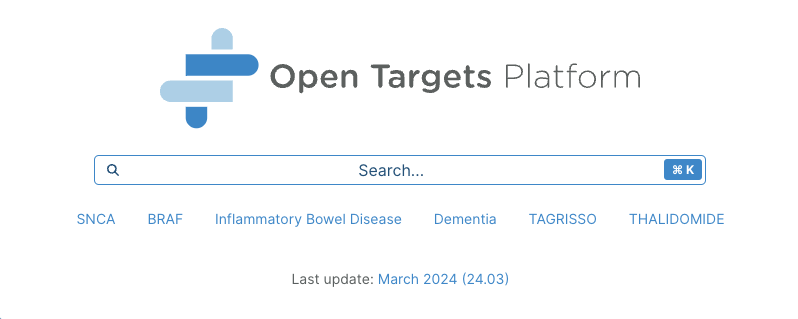